In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
N_FEATURES = 8

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [13]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [15]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'
# naveen_prep
path='/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/'
# olsson_prep
# path='/media/naveen/nav/mat_codes/BioPatRec/olsson_prep_WOR_BP_D2/Total_process_TT/'

In [16]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
# naveen_path
file_path_train=path+'Biopatrec_26c_17s_LP_wave_train'+'.'+'csv'
# olsson_path
# file_path_train=path+'Biopatrec_olsson_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/Biopatrec_26c_17s_LP_wave_train.csv


In [17]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
# naveen_path
file_path_test=path+'Biopatrec_26c_17s_LP_wave_test'+'.'+'csv'
# olsson_path
# file_path_test=path+'Biopatrec_olsson_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/Biopatrec_26c_17s_LP_wave_test.csv


In [18]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.034502,0.045171,0.031709,0.030337,0.028660,0.025751,0.029426,0.032457,1.0
1,0.034502,0.045169,0.031713,0.030335,0.028659,0.025750,0.029424,0.032455,1.0
2,0.034503,0.045168,0.031717,0.030333,0.028659,0.025749,0.029423,0.032452,1.0
3,0.034503,0.045166,0.031721,0.030331,0.028659,0.025747,0.029422,0.032450,1.0
4,0.034504,0.045165,0.031725,0.030329,0.028658,0.025746,0.029421,0.032447,1.0
5,0.034504,0.045163,0.031729,0.030327,0.028658,0.025745,0.029420,0.032445,1.0
6,0.034505,0.045161,0.031733,0.030325,0.028658,0.025743,0.029418,0.032443,1.0
7,0.034505,0.045160,0.031737,0.030323,0.028657,0.025742,0.029417,0.032440,1.0
8,0.034506,0.045158,0.031741,0.030320,0.028657,0.025741,0.029416,0.032438,1.0
9,0.034506,0.045156,0.031745,0.030318,0.028657,0.025740,0.029415,0.032435,1.0


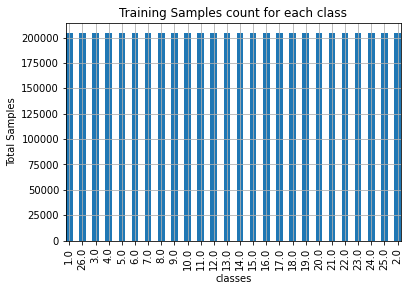

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.030507,0.041623,0.021424,0.036203,0.032812,0.024262,0.024071,0.031742,1.0
1,0.030366,0.041623,0.021436,0.036196,0.032807,0.024263,0.024073,0.031741,1.0
2,0.030198,0.041624,0.021448,0.036188,0.032802,0.024263,0.024075,0.031739,1.0
3,0.029998,0.041624,0.021459,0.036181,0.032797,0.024264,0.024077,0.031738,1.0
4,0.029821,0.041624,0.021471,0.036173,0.032792,0.024264,0.024080,0.031737,1.0
5,0.029798,0.041625,0.021482,0.036166,0.032786,0.024265,0.024082,0.031735,1.0
6,0.029798,0.041625,0.021493,0.036158,0.032781,0.024265,0.024084,0.031734,1.0
7,0.029675,0.041625,0.021505,0.036151,0.032776,0.024265,0.024086,0.031733,1.0
8,0.029672,0.041624,0.021517,0.036143,0.032771,0.024266,0.024088,0.031732,1.0
9,0.029951,0.041624,0.021529,0.036136,0.032766,0.024266,0.024090,0.031730,1.0


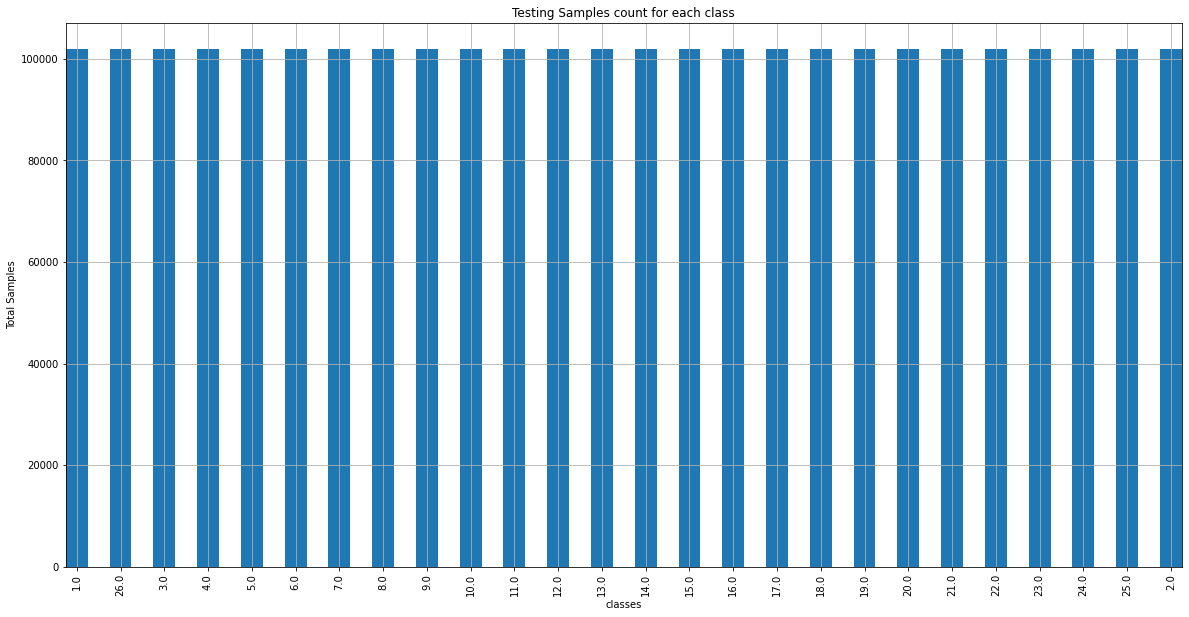

In [21]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02943,0.03246,1.00000
1,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02942,0.03245,1.00000
2,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
3,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
4,0.03450,0.04516,0.03173,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000


In [23]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [24]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.40862,-0.38335,-0.31710,-0.19573,-0.20851,-0.25914,-0.23657,-0.25710,1.00000
1,-0.40862,-0.38336,-0.31707,-0.19576,-0.20853,-0.25915,-0.23658,-0.25713,1.00000
2,-0.40861,-0.38336,-0.31704,-0.19579,-0.20853,-0.25916,-0.23659,-0.25717,1.00000
3,-0.40861,-0.38337,-0.31700,-0.19582,-0.20853,-0.25918,-0.23660,-0.25719,1.00000
4,-0.40860,-0.38338,-0.31697,-0.19585,-0.20854,-0.25919,-0.23661,-0.25723,1.00000


In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03051,0.04162,0.02142,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
1,0.03037,0.04162,0.02144,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
2,0.03020,0.04162,0.02145,0.03619,0.03280,0.02426,0.02407,0.03174,1.00000
3,0.03000,0.04162,0.02146,0.03618,0.03280,0.02426,0.02408,0.03174,1.00000
4,0.02982,0.04162,0.02147,0.03617,0.03279,0.02426,0.02408,0.03174,1.00000


In [27]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [28]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.44073,-0.40073,-0.40371,-0.10845,-0.15168,-0.27363,-0.28653,-0.26682,1.00000
1,-0.44187,-0.40073,-0.40361,-0.10855,-0.15175,-0.27362,-0.28651,-0.26683,1.00000
2,-0.44322,-0.40072,-0.40351,-0.10867,-0.15182,-0.27362,-0.28649,-0.26686,1.00000
3,-0.44482,-0.40072,-0.40341,-0.10878,-0.15189,-0.27361,-0.28647,-0.26687,1.00000
4,-0.44625,-0.40072,-0.40331,-0.10889,-0.15196,-0.27361,-0.28644,-0.26689,1.00000


In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.40862 -0.38335 -0.31710 -0.19573 -0.20851 -0.25914 -0.23657   
1       -0.40862 -0.38336 -0.31707 -0.19576 -0.20853 -0.25915 -0.23658   
2       -0.40861 -0.38336 -0.31704 -0.19579 -0.20853 -0.25916 -0.23659   
3       -0.40861 -0.38337 -0.31700 -0.19582 -0.20853 -0.25918 -0.23660   
4       -0.40860 -0.38338 -0.31697 -0.19585 -0.20854 -0.25919 -0.23661   
...          ...      ...      ...      ...      ...      ...      ...   
5303995 -0.37664 -0.35320 -0.29846 -0.13343 -0.26037 -0.29086 -0.21241   
5303996 -0.35513 -0.34917 -0.26169 -0.12629 -0.25887 -0.29087 -0.21223   
5303997 -0.32655 -0.34482 -0.21624 -0.11864 -0.25727 -0.29088 -0.21206   
5303998 -0.30417 -0.34102 -0.17755 -0.11227 -0.25593 -0.29088 -0.21188   
5303999 -0.31013 -0.33858 -0.16242 -0.10900 -0.25523 -0.29089 -0.21170   

              C8  Class_label  ActivityEncoded  
0       -0.25710      1.00000                0  

In [30]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [31]:
# The number of steps within one time segment
TIME_PERIODS = 6000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 6000

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (883, 6000, 8)
883 training samples
y_train shape:  (883,)
6000
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
x_train shape: (6000, 8)
input_shape: (6000, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (883, 26)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (441, 6000, 8)
441 testing samples
y_test shape:  (441,)


In [50]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 10, 600
n_depth=8
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (883, 10, 600, 8)
x_test shape:  (441, 10, 600, 8)
n_outputs 26


In [51]:
# # n_steps, n_length = 20, 25
# # n_steps, n_length= 10, 50
# # n_steps, n_length= 16, 32
# n_steps, n_length = 50, 200
# n_depth,n_sub =12,1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_test shape: ', x_test.shape)
# n_outputs = y_train_hot.shape[1]
# print('n_outputs',n_outputs)

In [52]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [53]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [54]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [55]:
verbose, epochs, batch_size = 0, 300,16

In [56]:
# naveen architecture
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Dense(2000, activation='tanh'))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [57]:
# # olsson architecture
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [58]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_18 (TimeDis (None, 10, 300, 64)       4672      
_________________________________________________________________
time_distributed_19 (TimeDis (None, 10, 300, 64)       256       
_________________________________________________________________
time_distributed_20 (TimeDis (None, 10, 147, 64)       0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, 10, 147, 64)       0         
_________________________________________________________________
time_distributed_22 (TimeDis (None, 10, 74, 64)        20544     
_________________________________________________________________
time_distributed_23 (TimeDis (None, 10, 74, 64)        256       
_________________________________________________________________
time_distributed_24 (TimeDis (None, 10, 74, 64)       

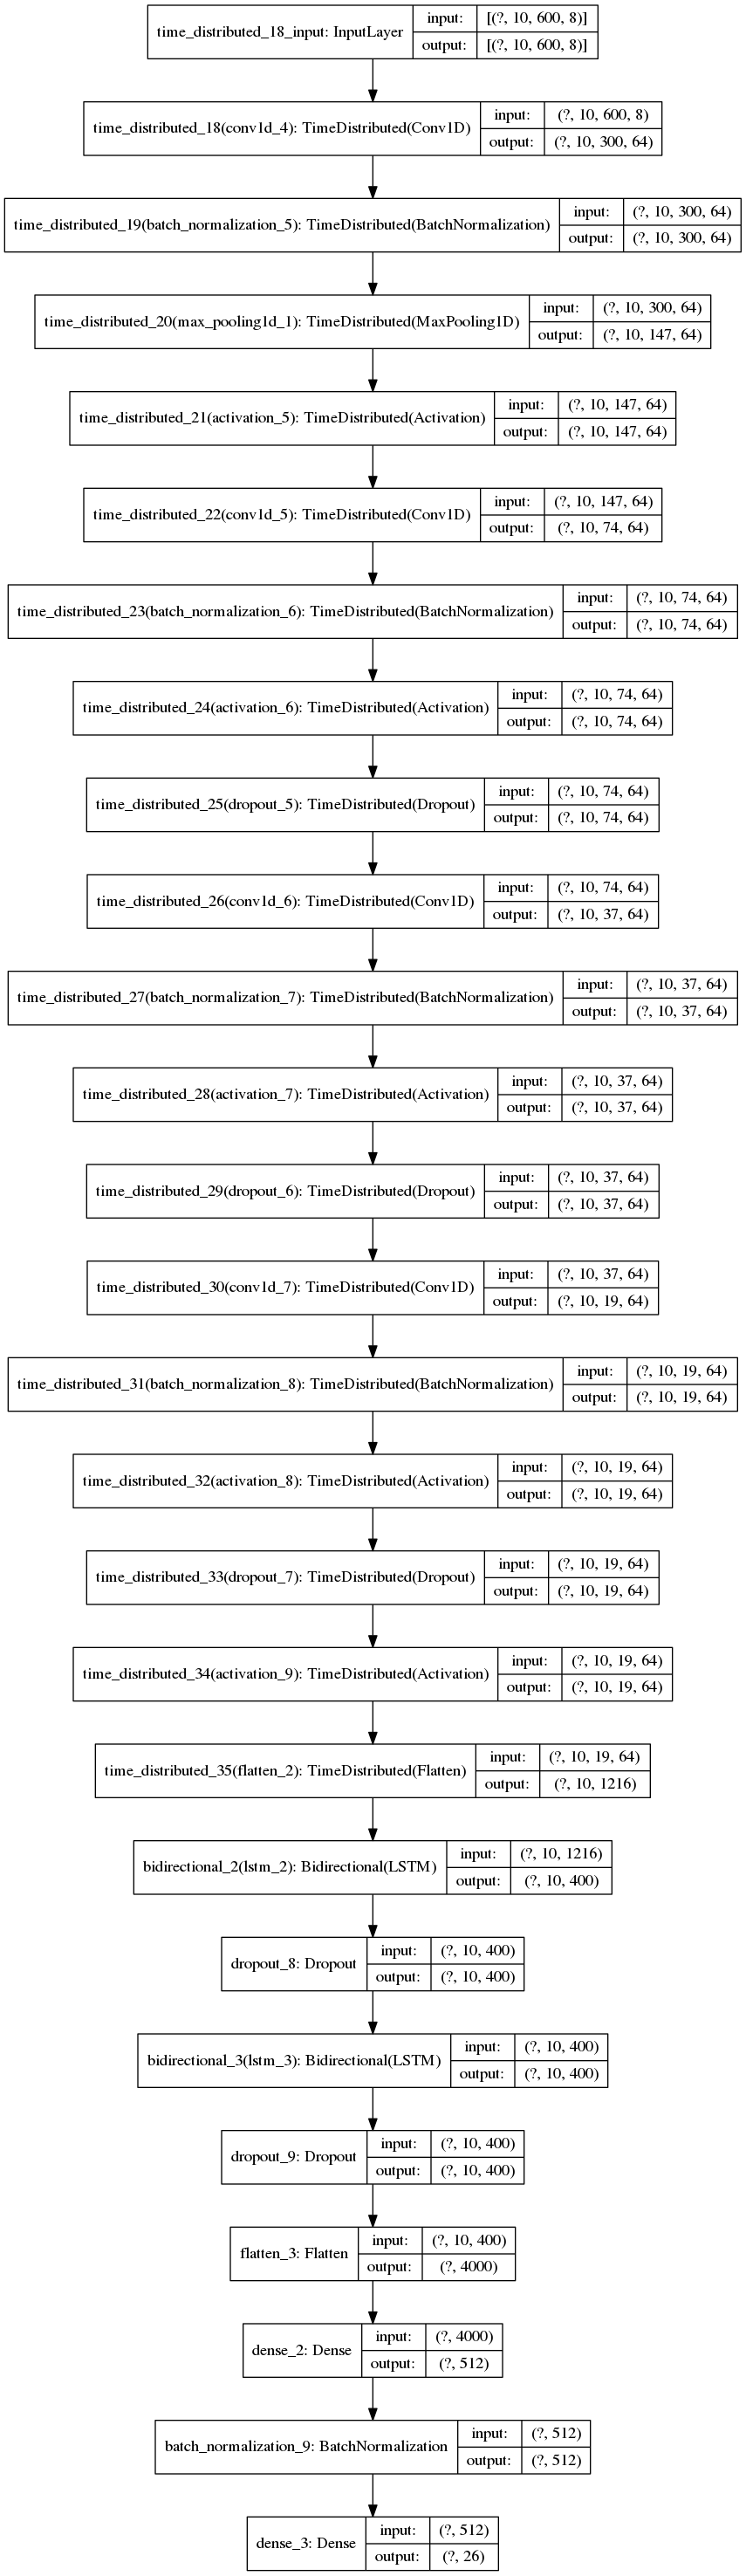

In [59]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [60]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/300
56/56 [==============================] - ETA: 0s - loss: 4.5846 - accuracy: 0.0781
Epoch 00001: val_accuracy improved from -inf to 0.18141, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
56/56 [==============================] - 32s 572ms/step - loss: 4.5846 - accuracy: 0.0781 - val_loss: 3.6710 - val_accuracy: 0.1814 - lr: 0.0010
Epoch 2/300
55/56 [============================>.] - ETA: 0s - loss: 3.6215 - accuracy: 0.1420
Epoch 00002: val_accuracy improved from 0.18141 to 0.20181, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
56/56 [==============================] - 1s 26ms/step - loss: 3.6218 - accuracy: 0.1416 - val_loss: 3.0743 - val_accuracy: 0.2018 - lr: 0.0010
Epoch 3/300
55/56 [============================>.] - ETA: 0s - loss: 3.0302 - accuracy: 0.2057
Epoch 00003: val_accuracy did not improve from 0.20181
56/56 [==============================] - 1s 25ms/step - loss: 3.0305 - accuracy: 0.2050 - val_l

Epoch 26/300
55/56 [============================>.] - ETA: 0s - loss: 0.9001 - accuracy: 0.8045
Epoch 00026: val_accuracy did not improve from 0.69161
56/56 [==============================] - 1s 26ms/step - loss: 0.9009 - accuracy: 0.8041 - val_loss: 1.8786 - val_accuracy: 0.4898 - lr: 0.0010
Epoch 27/300
55/56 [============================>.] - ETA: 0s - loss: 0.7997 - accuracy: 0.8534
Epoch 00027: val_accuracy improved from 0.69161 to 0.70522, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
56/56 [==============================] - 2s 27ms/step - loss: 0.8003 - accuracy: 0.8528 - val_loss: 1.1596 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 28/300
55/56 [============================>.] - ETA: 0s - loss: 0.7460 - accuracy: 0.8636
Epoch 00028: val_accuracy did not improve from 0.70522
56/56 [==============================] - 1s 25ms/step - loss: 0.7513 - accuracy: 0.8618 - val_loss: 3.1185 - val_accuracy: 0.4059 - lr: 0.0010
Epoch 29/300
55/56 [=============

Epoch 53/300
55/56 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.9716
Epoch 00053: val_accuracy did not improve from 0.72562
56/56 [==============================] - 1s 26ms/step - loss: 0.4094 - accuracy: 0.9706 - val_loss: 1.4974 - val_accuracy: 0.6440 - lr: 0.0010
Epoch 54/300
55/56 [============================>.] - ETA: 0s - loss: 0.4615 - accuracy: 0.9534
Epoch 00054: val_accuracy did not improve from 0.72562
56/56 [==============================] - 1s 25ms/step - loss: 0.4672 - accuracy: 0.9524 - val_loss: 1.6816 - val_accuracy: 0.6327 - lr: 0.0010
Epoch 55/300
55/56 [============================>.] - ETA: 0s - loss: 0.4637 - accuracy: 0.9500
Epoch 00055: val_accuracy did not improve from 0.72562
56/56 [==============================] - 1s 26ms/step - loss: 0.4681 - accuracy: 0.9490 - val_loss: 2.1500 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 56/300
55/56 [============================>.] - ETA: 0s - loss: 0.4933 - accuracy: 0.9352
Epoch 00056: val_accur

55/56 [============================>.] - ETA: 0s - loss: 0.3050 - accuracy: 0.9955
Epoch 00080: val_accuracy did not improve from 0.76644
56/56 [==============================] - 1s 26ms/step - loss: 0.3093 - accuracy: 0.9943 - val_loss: 1.0518 - val_accuracy: 0.7664 - lr: 1.0000e-04
Epoch 81/300
55/56 [============================>.] - ETA: 0s - loss: 0.3057 - accuracy: 0.9966
Epoch 00081: val_accuracy did not improve from 0.76644
56/56 [==============================] - 1s 26ms/step - loss: 0.3059 - accuracy: 0.9966 - val_loss: 1.0789 - val_accuracy: 0.7460 - lr: 1.0000e-04
Epoch 82/300
55/56 [============================>.] - ETA: 0s - loss: 0.3018 - accuracy: 0.9989
Epoch 00082: val_accuracy did not improve from 0.76644
56/56 [==============================] - 1s 25ms/step - loss: 0.3029 - accuracy: 0.9977 - val_loss: 1.0765 - val_accuracy: 0.7664 - lr: 1.0000e-04
Epoch 83/300
55/56 [============================>.] - ETA: 0s - loss: 0.3016 - accuracy: 0.9943
Epoch 00083: val_accura

Epoch 107/300
55/56 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.9989
Epoch 00107: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 26ms/step - loss: 0.2784 - accuracy: 0.9989 - val_loss: 1.0672 - val_accuracy: 0.7506 - lr: 1.0000e-04
Epoch 108/300
55/56 [============================>.] - ETA: 0s - loss: 0.2779 - accuracy: 0.9966
Epoch 00108: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 25ms/step - loss: 0.2781 - accuracy: 0.9966 - val_loss: 1.0707 - val_accuracy: 0.7619 - lr: 1.0000e-04
Epoch 109/300
55/56 [============================>.] - ETA: 0s - loss: 0.2772 - accuracy: 0.9966
Epoch 00109: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 26ms/step - loss: 0.2804 - accuracy: 0.9955 - val_loss: 1.0673 - val_accuracy: 0.7619 - lr: 1.0000e-04
Epoch 110/300
55/56 [============================>.] - ETA: 0s - loss: 0.2888 - accuracy: 0.9966
Epoch 

Epoch 135/300
55/56 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 1.0000
Epoch 00135: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 25ms/step - loss: 0.2533 - accuracy: 1.0000 - val_loss: 1.0033 - val_accuracy: 0.7687 - lr: 1.0000e-04
Epoch 136/300
55/56 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.9977
Epoch 00136: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 26ms/step - loss: 0.2556 - accuracy: 0.9977 - val_loss: 1.0262 - val_accuracy: 0.7619 - lr: 1.0000e-04
Epoch 137/300
55/56 [============================>.] - ETA: 0s - loss: 0.2538 - accuracy: 0.9977
Epoch 00137: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 26ms/step - loss: 0.2543 - accuracy: 0.9977 - val_loss: 1.0655 - val_accuracy: 0.7528 - lr: 1.0000e-04
Epoch 138/300
55/56 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.9966
Epoch 

Epoch 163/300
55/56 [============================>.] - ETA: 0s - loss: 0.2463 - accuracy: 0.9989
Epoch 00163: val_accuracy did not improve from 0.78231
56/56 [==============================] - 2s 27ms/step - loss: 0.2468 - accuracy: 0.9989 - val_loss: 1.0298 - val_accuracy: 0.7528 - lr: 1.0000e-05
Epoch 164/300
56/56 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9977
Epoch 00164: val_accuracy did not improve from 0.78231
56/56 [==============================] - 2s 28ms/step - loss: 0.2487 - accuracy: 0.9977 - val_loss: 1.0233 - val_accuracy: 0.7710 - lr: 1.0000e-05
Epoch 165/300
55/56 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.9977
Epoch 00165: val_accuracy did not improve from 0.78231
56/56 [==============================] - 2s 28ms/step - loss: 0.2514 - accuracy: 0.9977 - val_loss: 1.0240 - val_accuracy: 0.7596 - lr: 1.0000e-05
Epoch 166/300
55/56 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 1.0000
Epoch 

Epoch 191/300
55/56 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.9989
Epoch 00191: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 26ms/step - loss: 0.2478 - accuracy: 0.9989 - val_loss: 1.0038 - val_accuracy: 0.7664 - lr: 1.0000e-05
Epoch 192/300
55/56 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.9955
Epoch 00192: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 25ms/step - loss: 0.2519 - accuracy: 0.9932 - val_loss: 1.0472 - val_accuracy: 0.7642 - lr: 1.0000e-05
Epoch 193/300
55/56 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 1.0000
Epoch 00193: val_accuracy did not improve from 0.78231
56/56 [==============================] - 1s 26ms/step - loss: 0.2448 - accuracy: 1.0000 - val_loss: 1.0376 - val_accuracy: 0.7687 - lr: 1.0000e-05
Epoch 194/300
55/56 [============================>.] - ETA: 0s - loss: 0.2451 - accuracy: 0.9977
Epoch 

54/56 [===========================>..] - ETA: 0s - loss: 0.2421 - accuracy: 1.0000
Epoch 00218: val_accuracy did not improve from 0.78685
56/56 [==============================] - 1s 26ms/step - loss: 0.2423 - accuracy: 1.0000 - val_loss: 1.0107 - val_accuracy: 0.7732 - lr: 1.0000e-06
Epoch 219/300
55/56 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.9989
Epoch 00219: val_accuracy did not improve from 0.78685
56/56 [==============================] - 1s 24ms/step - loss: 0.2431 - accuracy: 0.9989 - val_loss: 1.0259 - val_accuracy: 0.7664 - lr: 1.0000e-06
Epoch 220/300
55/56 [============================>.] - ETA: 0s - loss: 0.2431 - accuracy: 0.9989
Epoch 00220: val_accuracy did not improve from 0.78685
56/56 [==============================] - 1s 26ms/step - loss: 0.2470 - accuracy: 0.9977 - val_loss: 1.0335 - val_accuracy: 0.7642 - lr: 1.0000e-06
Epoch 221/300
55/56 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 1.0000
Epoch 00221: val_acc

In [61]:
# #     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
# history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


In [62]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 205
train accuracy and validation accuracy 1.0 0.7868480682373047


In [63]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


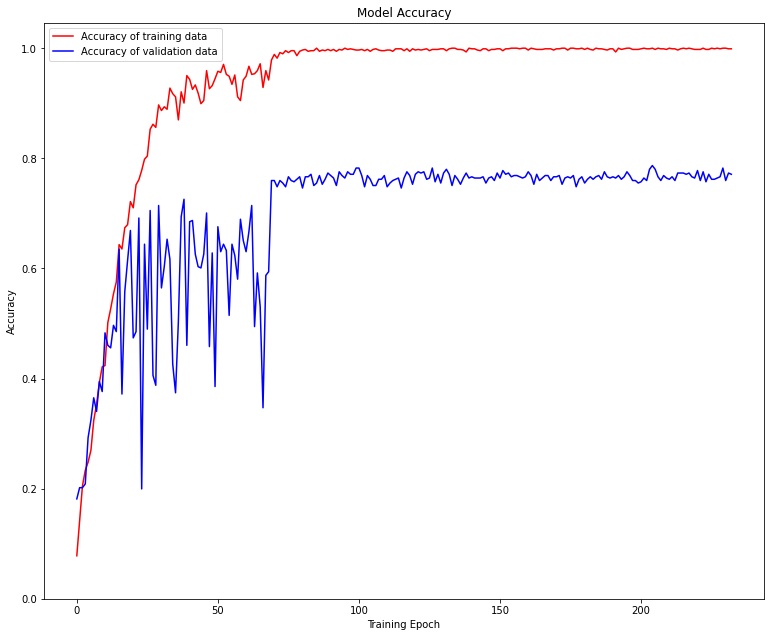

In [64]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [65]:
for i in history.history:
    print("history",i)
# facecolor='black'
ax= figBPR.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black") 

figBPR=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r--', label='Loss on training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss on validation data')
plt.title('Loss Curve for BioPatRec')

plt.ylabel('Loss')
plt.xlabel('Training Epoch')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


NameError: name 'figBPR' is not defined

In [ ]:
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.png',transparent=False)
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.pdf',transparent=False)

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [ ]:
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=3,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))